In [1]:
LEARNING_RATE = 0.001
EPOCHS_VALUE = 300

In [2]:
import pandas as pd

file = pd.read_csv('./diabetes.csv')
df = pd.DataFrame(file)
df

/var/folders/my/rbl5q7yd7pxb2yk9_qjc7mjr0000gn/T/ipykernel_16810/122538871.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
print('Total data:', df.shape[0])
print('Total features:', df.shape[1])

Total data: 768
Total features: 9


Text(0.5, 1.0, 'persebaran seluruh data berdasarkan umur')

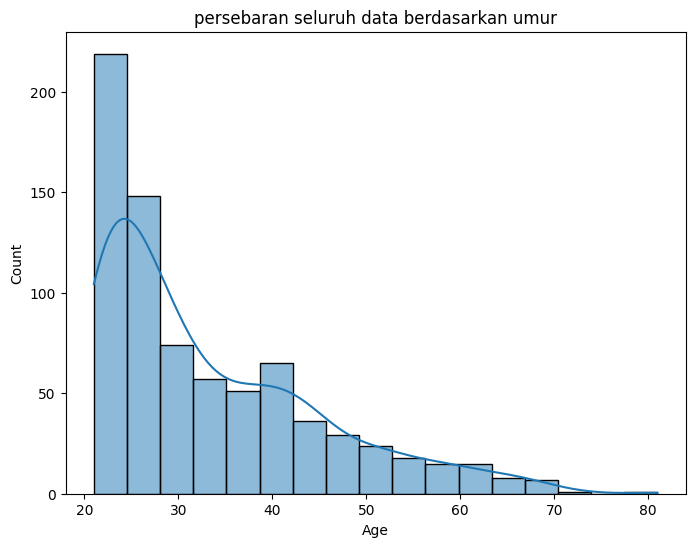

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.histplot(df['Age'], kde=True)  # Basic displot
plt.title('persebaran seluruh data berdasarkan umur')

<Axes: title={'center': 'persebaran data yang terkena diabetes berdasarkan umur'}, xlabel='Age', ylabel='Count'>

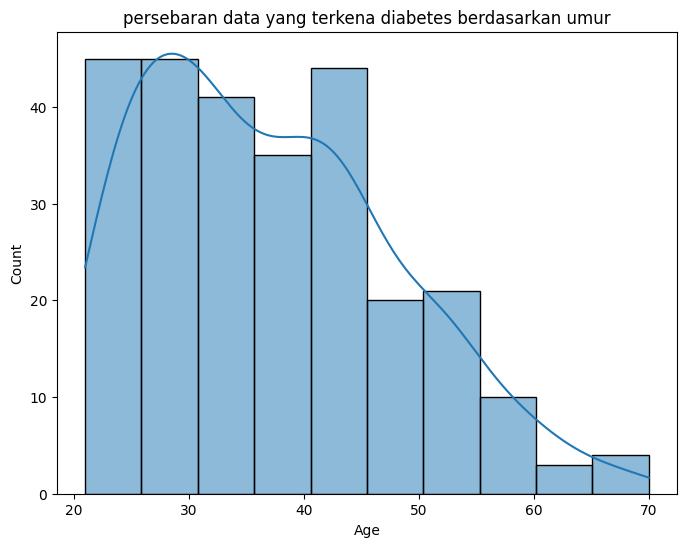

In [7]:
plt.figure(figsize=(8,6))
plt.title('persebaran data yang terkena diabetes berdasarkan umur')
sns.histplot(df[df['Outcome'] == 1]['Age'], kde=True)  # Basic displot

In [8]:
features = df.drop(columns=('Outcome'), axis=1)
features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [9]:
labels = df['Outcome']
labels

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [10]:
# Train test split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=24)

In [11]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
280,0,146,70,0,0,37.9,0.334,28
528,0,117,66,31,188,30.8,0.493,22
569,0,121,66,30,165,34.3,0.203,33
495,6,166,74,0,0,26.6,0.304,66
638,7,97,76,32,91,40.9,0.871,32
...,...,...,...,...,...,...,...,...
145,0,102,75,23,0,0.0,0.572,21
401,6,137,61,0,0,24.2,0.151,55
343,5,122,86,0,0,34.7,0.290,33
192,7,159,66,0,0,30.4,0.383,36


In [12]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
313,3,113,50,10,85,29.5,0.626,25
99,1,122,90,51,220,49.7,0.325,31
550,1,116,70,28,0,27.4,0.204,21
334,1,95,60,18,58,23.9,0.260,22
211,0,147,85,54,0,42.8,0.375,24
...,...,...,...,...,...,...,...,...
244,2,146,76,35,194,38.2,0.329,29
398,3,82,70,0,0,21.1,0.389,25
684,5,136,82,0,0,0.0,0.640,69
730,3,130,78,23,79,28.4,0.323,34


In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

def create_model(input_dim, input_neuron, learning_rate, hidden_layers, ):
    model = Sequential()
    model.add(Dense(input_neuron, input_dim=input_dim, activation='relu'))

    for value in hidden_layers:
        model.add(Dense(value['neurons'], activation='relu'))

    model.add(Dense(1, activation='sigmoid')) # output layer
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

---

### Follow the tutorials

In [14]:
hidden_layers = [
  {'neurons': 8},
]

model = create_model(input_dim=8, input_neuron=8, learning_rate=0.01, hidden_layers=hidden_layers)
model.fit(X_train, y_train, epochs=300, batch_size=8)
model.summary()

Epoch 1/300
77/77 [==============================] - 0s 626us/step - loss: 2.6355 - accuracy: 0.5993
Epoch 2/300
77/77 [==============================] - 0s 501us/step - loss: 0.7659 - accuracy: 0.6596
Epoch 3/300
77/77 [==============================] - 0s 464us/step - loss: 0.6875 - accuracy: 0.6808
Epoch 4/300
77/77 [==============================] - 0s 489us/step - loss: 0.6514 - accuracy: 0.6694
Epoch 5/300
77/77 [==============================] - 0s 470us/step - loss: 0.6310 - accuracy: 0.6889
Epoch 6/300
77/77 [==============================] - 0s 489us/step - loss: 0.6354 - accuracy: 0.6596
Epoch 7/300
77/77 [==============================] - 0s 475us/step - loss: 0.6190 - accuracy: 0.6954
Epoch 8/300
77/77 [==============================] - 0s 504us/step - loss: 0.6232 - accuracy: 0.6678
Epoch 9/300
77/77 [==============================] - 0s 483us/step - loss: 0.6056 - accuracy: 0.6971
Epoch 10/300
77/77 [==============================] - 0s 485us/step - loss: 0.5997 - accura

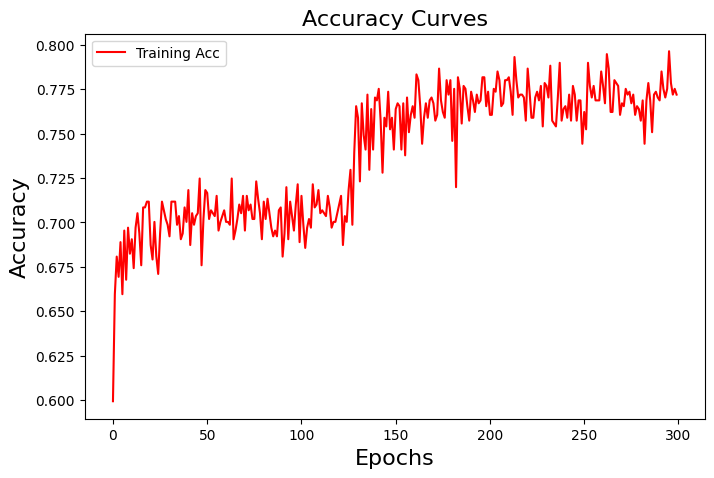

In [15]:
plt.figure(figsize=[8,5])
plt.plot(model.history.history['accuracy'], 'r')
plt.legend(['Training Acc'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

In [16]:
# evaluate the keras model
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(loss)
print(f'Accuracy: {accuracy*100:.2f}')

0.5530170202255249
Accuracy: 75.32


In [17]:
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()  # Flatten the array
y_pred = [int(round(x)) for x in y_pred]  # Convert to 1 or 0

5/5 [==============================] - 0s 694us/step


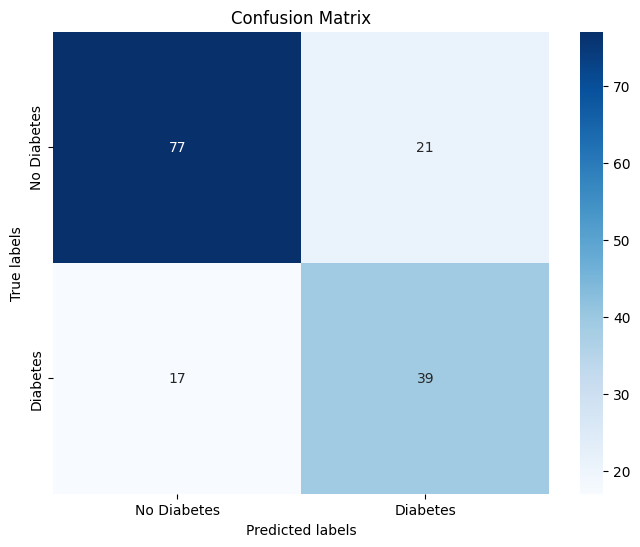

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


# Define the class labels
class_labels = ['No Diabetes', 'Diabetes']

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

---

### arsitektur "narrow and shallow" 

dapat menggunakan jumlah `sedikit layer` dan `sedikit neuron` dalam setiap layer.

`Misalnya, dapat menggunakan satu atau dua hidden layer dengan sedikit neuron dalam setiap layer.`

---

### arsitektur "narrow and wide" pada model.

menggunakan lebih `sedikit layer` tetapi dengan `lebih banyak neuron` dalam setiap layer. 

---

### arsitektur "deep and shallow"

menggunakan `lebih banyak layer` tetapi dengan `sedikit neuron` dalam setiap layer. 

---

### arsitektur "deep and wide" pada model

menggunakan `lebih banyak layer` dan `lebih banyak neuron` dalam setiap layer. 

---

Pemilihan arsitektur neural network tergantung pada dataset, kompleksitas masalah, dan sumber daya yang tersedia. Berikut adalah panduan umum untuk memilih arsitektur yang sesuai:

- Narrow and Shallow: Cocok untuk dataset kecil atau sederhana. Biasanya digunakan untuk masalah yang relatif mudah dipelajari oleh model.

- Narrow and Wide: Cocok untuk dataset yang lebih besar atau lebih kompleks. Dengan memiliki lebih banyak neuron dalam setiap layer, model dapat mempelajari representasi-fitur yang lebih kompleks.

- Deep and Shallow: Cocok untuk dataset yang lebih besar atau lebih kompleks. Dengan memiliki banyak layer, model dapat mempelajari hierarki fitur yang lebih dalam dan kompleks.

- Deep and Wide: Cocok untuk dataset yang sangat besar atau sangat kompleks. Dengan memiliki banyak layer dan banyak neuron dalam setiap layer, model dapat mempelajari representasi-fitur yang sangat kompleks.

Jadi, pemilihan arsitektur tergantung pada karakteristik dataset dan kompleksitas masalah. 